In [63]:
import numpy as np
import pandas as pd

In [64]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [66]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Dataset is now stored in a Pandas Dataframe

In [67]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [69]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [70]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [71]:
df["ocean_proximity"].nunique()

5

In [72]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [73]:
#histogram to show statistical values,,,how many values in this range

<function matplotlib.pyplot.show>

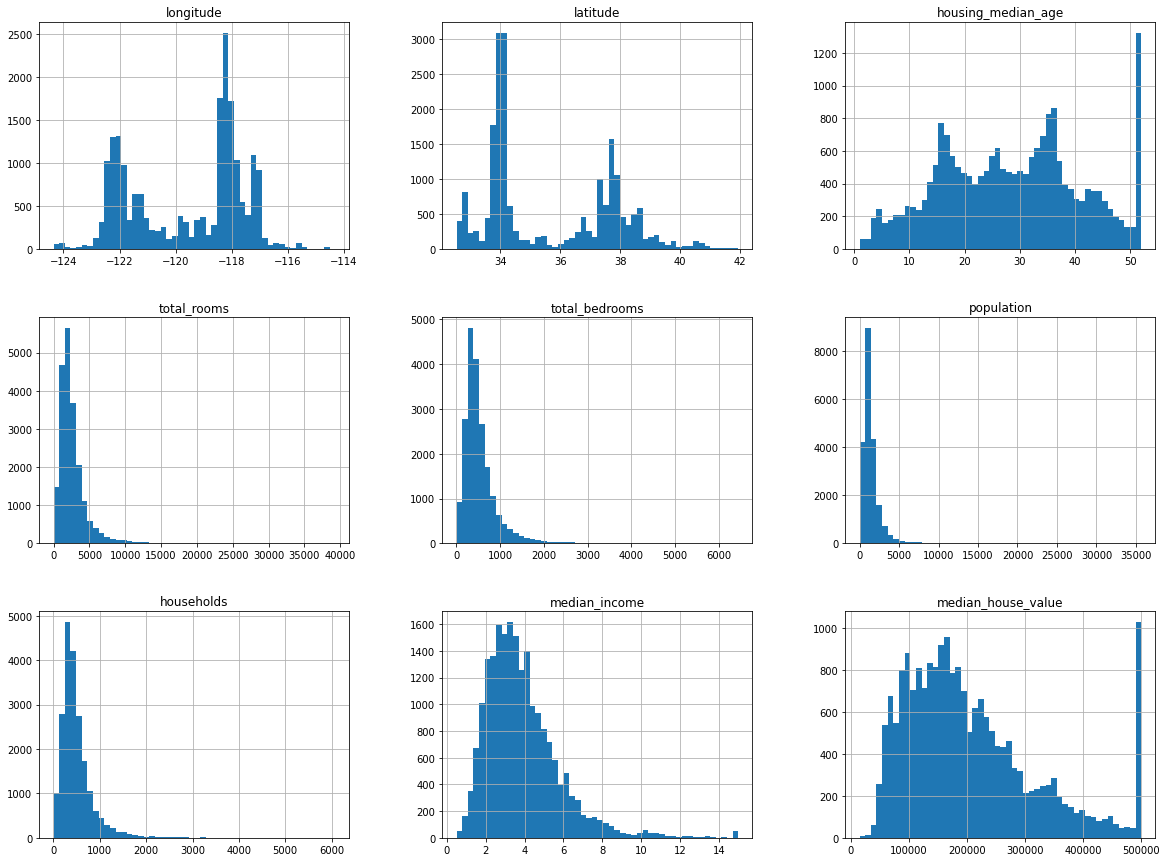

In [74]:
%matplotlib inline
#only in a jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show

In [75]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [76]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [77]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [78]:
#not wise to train and test before feature engineering

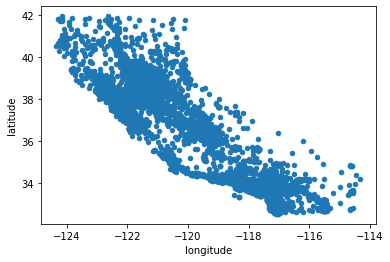

In [79]:
df.plot(kind="scatter", x="longitude", y="latitude")

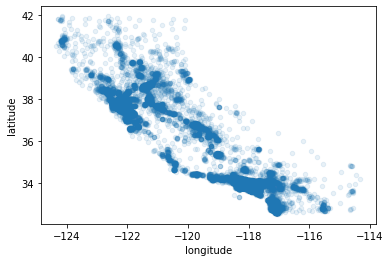

In [80]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

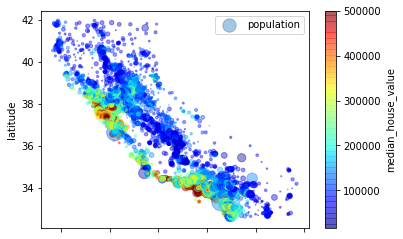

In [81]:
#visualize number of ppl living in a place and house prices
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s= df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

In [82]:
corr_matrix = df.corr()

In [83]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [84]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2cb89fd0>,
      dtype=object)

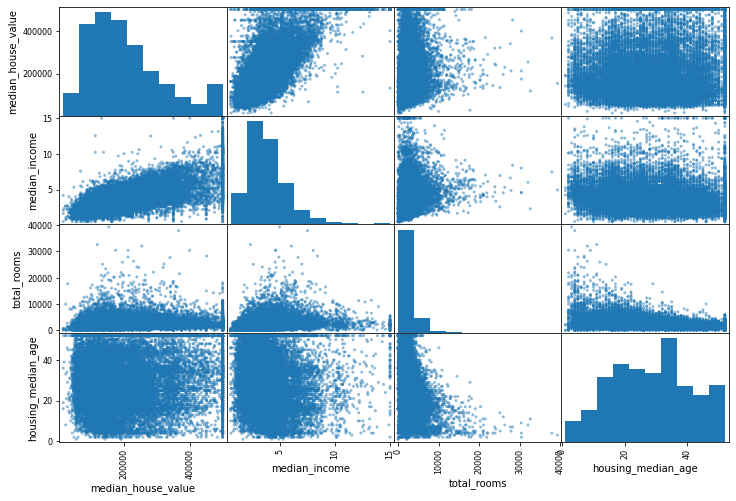

In [85]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [86]:
df["rooms_per_house"] = df["total_rooms"]/df["households"]
df["bedrooms_per_house"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_house             0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_house         -0.255880
Name: median_house_value, dtype: float64

In [87]:
#above is feature augmentation

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_house           20640 non-null  float64
 11  bedrooms_per_house        20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [89]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [91]:
df_num = df.drop("ocean_proximity", axis=1)
ocean_prox=df['ocean_proximity']

In [94]:
df_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [95]:
df_num.median().values
imputer.fit(df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [96]:
X = imputer.transform(df_num)

In [97]:
X

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]])

In [98]:
df = pd.DataFrame(X, columns=df_num.columns)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_house           20640 non-null  float64
 10  bedrooms_per_house        20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [100]:
df['ocean_proximity'] = ocean_prox

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_house           20640 non-null  float64
 10  bedrooms_per_house        20640 non-null  float64
 11  population_per_household  20640 non-null  float64
 12  ocean_proximity           20640 non-null  object 
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [102]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df_cat_1hot = encoder.fit_transform(df['ocean_proximity'])
df_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [108]:
type(df_cat_1hot)

numpy.ndarray

In [109]:
encoded=list(df_cat_1hot)

In [111]:
df['ocean_proximity']=encoded

In [112]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_per_house,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,"[0, 0, 0, 1, 0]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,"[0, 0, 0, 1, 0]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,"[0, 0, 0, 1, 0]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,"[0, 0, 0, 1, 0]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,"[0, 0, 0, 1, 0]"


In [113]:
df=df.drop('ocean_proximity', axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_house           20640 non-null  float64
 10  bedrooms_per_house        20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [115]:
Y=df['median_house_value']
X=df.drop('median_house_value', axis=1)

In [116]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_per_house,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467


In [131]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [170]:
scale=StandardScaler()

In [171]:
scaled=scale.fit_transform(X)

In [172]:
scaled[0,:]

array([-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
       -0.9744286 , -0.97703285,  2.34476576,  0.62855945, -1.14993031,
       -0.04959654])

In [175]:
scaled.shape

(20640, 11)

In [176]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [177]:
Xtrain.shape

(16512, 11)

In [178]:
Xtest.shape

(4128, 11)

In [179]:
Ytrain.shape

(16512,)

In [180]:
Ytest.shape

(4128,)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
lin=LinearRegression()

In [186]:
lin.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
ypred=lin.predict(Xtest)

In [188]:
ypred

array([ 42983.57570494, 164943.12907354, 295914.58903081, ...,
       448538.02485535, 125017.92243647, 178999.7696113 ])

In [189]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse=mean_squared_error(Ytest, ypred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse


69880.36538422374

In [190]:
ypred_train=lin.predict(Xtrain)

In [191]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse=mean_squared_error(Ytrain, ypred_train)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68311.8562967575

In [192]:
from sklearn.tree import DecisionTreeRegressor

In [193]:
dtree=DecisionTreeRegressor(max_depth=3)

In [194]:
dtree.fit(Xtrain, Ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [195]:
ydtree_pred=dtree.predict(Xtest)

In [196]:
from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error(Ytest, ydtree_pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

80150.54466605726

In [197]:
ydtree_pred_train=dtree.predict(Xtrain)

In [198]:
from sklearn.metrics import mean_squared_error
lin_mse=mean_squared_error(Ytrain, ydtree_pred_train)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

78595.66783435711